# <span style="color:#336699">PROGRAMAÇÃO APLICADA À PRODUÇÃO DE DADOS PARA ESTUDO DA DEGRADAÇÃO FLORESTAL NA AMAZÔNIA</span>
<hr style="border:2px solid #0077b9;"> 


# Introdução

<p style="text-align: justify">Existem na literatura diversas definições de degradação florestal e estas variam de acordo com os fatores que a causaram, a fitofisionomia envolvida e com o objetivo do estudo (LUND, 2009; PINHEIRO, 2015). Exsitem aboradagens mais generalistas, como a da [FAO](http://www.fao.org/forestry/15533-0cb816e82c09c14873ce9226dd13910b9.pdf) (Food and Agriculture Organization) e , portanto, vagas e as muito específicas, como a da [CNPS](https://www.cnps.org/wp-content/uploads/2018/04/landscaping.pdf) (California Native Plant Society).</p>

<p style="text-align: justify">Neste estudo, foi utilizado o conceito de degradação florestal elaborado pelo [INPE](http://www.obt.inpe.br/prodes/Relatorio_Prodes2008.pdf) (2008), que, sob uma perspectiva operacional, define que degradação florestal como sendo "*o processo gradual e de longo-prazo da perda da cobertura florestal por meio da extração seletiva de madeira e da ocorrência de incêndios florestais*". Sob essa perspectiva operacional é possivel, utlizando imagens de satélite, reconhecer, mapear e classificar os padrões de degradação florestal, conforme é mostrado na `Figura 1`.</p>

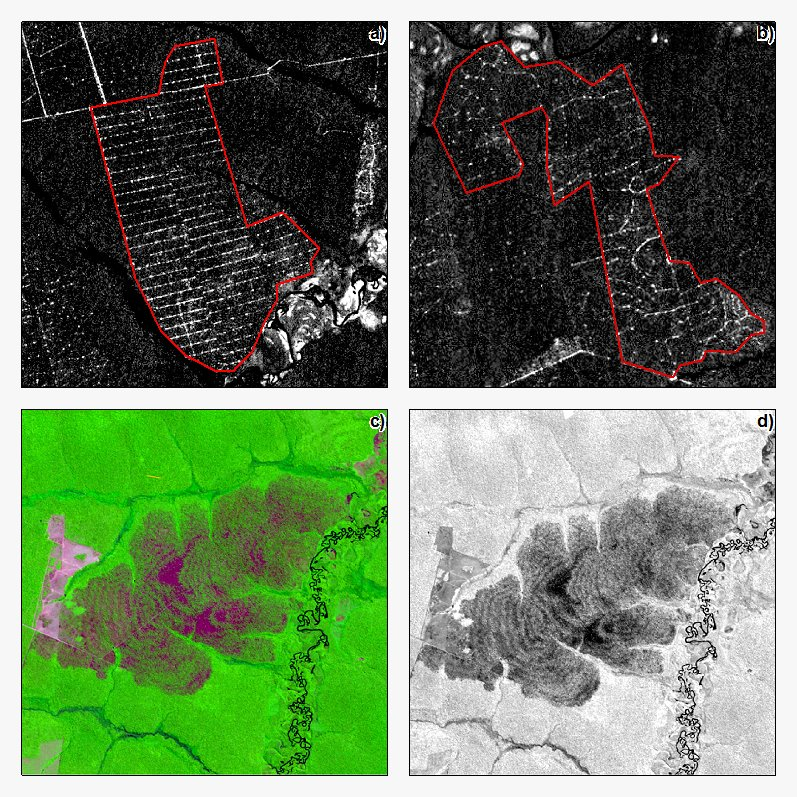

<p style="text-align: center">Figura 1 - Padrões de Degradação Florestal mostrados em imagens Landsat/TM, composição colorida RGB/345: a) padrão de exploração florestal por Plano de Manejo Florestal Sustentável (PMFS) observado na banda 5 do TM. b) exploração seletiva predatória também observada na banda 5 do TM. c) padrão de fogo florestal observado em composição colorida RGB/345 do TM. O padrão concêntrico e as faixas de vegetação em verde estão apontados pelas setas. d) padrão de fogo florestal observado na banda 4 do TM.  </p>


<p style="text-align: justify">Neste sentido, o presente trabalho se propõe a criar um programa que, a partir de imagens de satélite, seja capaz de automatizar o processo de produção de dados para estudo de degradação florestal decorrente de **exploração seletiva**. Essa produção foi baseada na metodologia proposta por [Pinheiro](http://mtc-m21b.sid.inpe.br/rep/sid.inpe.br/mtc-m21b/2016/08.22.17.01?metadatarepository=sid.inpe.br/mtc-m21b/2016/08.22.17.01.47&ibiurl.backgroundlanguage=en&ibiurl.requiredsite=mtc-m21b.sid.inpe.br+804&requiredmirror=sid.inpe.br/mtc-m21b/2013/09.26.14.25.22&searchsite=bibdigital.sid.inpe.br:80&searchmirror=sid.inpe.br/bibdigital@80/2006/11.11.23.17&choice=briefTitleAuthorMisc) (2016) que utiliza imagens fração derivados de modelo linear de mistura espectral ([SHIMABUKURO & SMITH](https://ieeexplore.ieee.org/document/103288/), 1991) para classificar os padrões de degradação florestal. Esta metodologia utiliza um índice espectral, denominado de DEGRADI, para realçar os elementos indicadores de degradação florestal por exploração seletiva, tais como ramais de arraste, estradas e pátios de estocagem. Posterior ao realce, as imagens realçadas foram fatiadas para separar os elementos indicadores de degradação florestal das áreas de floresta. O limiar de fatimaento é definido empírica e interativamente para cada imagem índice utilizada. </p>


*Utilizar os seguintes valores:
ganho = 50
offset = 100
limiar de fatiamento = aproximadamente 135

In [1]:
#IMPORTANDO DAS BIBLIOTECAS:

#BIBLIOTECA GDAL
from osgeo import gdal
#IMPORTAR CONSTANTES 
from gdalconst import *
#informar o uso de excessoes
gdal.UseExceptions()

#BIBLIOTECA MATPLOTLIB
import matplotlib
from matplotlib import pyplot as plt

#BIBLIOTECA NUMPY
import numpy as np

#mostrar versões das bibliotecas instaladas: 
print('Versão da GDAL: ',gdal.__version__,'\nVersão Matplotlib: ', matplotlib.__version__,'\nVersão Numpy: ',np.__version__)

Versão da GDAL:  2.2.2 
Versão Matplotlib:  2.2.2 
Versão Numpy:  1.14.2


In [2]:
#ABRINDO OS ARQUIVOS RASTER
solo = "C:/Users/vinic/ser347/trabalho_pratico/MLME/recorte-SOLO.tif"
veg = "C:/Users/vinic/ser347/trabalho_pratico/MLME/recorte-VEG.tif"

#CRIANDO O DATA SET E EXECUTANDO AS VERIFICAÇÕES

try:
    dataset_solo = gdal.Open(solo, GA_ReadOnly) 
    dataset_veg = gdal.Open(veg, GA_ReadOnly) 
except:
    print ("Erro na abertura de algum arquivo!")

# verificar compatibilidade de metadados
if (dataset_solo.GetProjectionRef() != dataset_veg.GetProjectionRef()):
    print("Sistemas de referência diferentes")
elif (dataset_solo.GetGeoTransform() != dataset_veg.GetGeoTransform()):
    print("Metadados espaciais diferentes")
else:
    # obter metadados
    linhas = dataset_solo.RasterYSize
    colunas = dataset_solo.RasterXSize

    # obter as bandas
    band_solo = dataset_solo.GetRasterBand(1)
    band_veg = dataset_veg.GetRasterBand(1)

    # gerar matrizes de pixels
    numpy_solo = band_solo.ReadAsArray() #colocar os valores zeros como NoData
    numpy_veg = band_veg.ReadAsArray()   #colocar os valores zeros como NoData
    
    print(numpy_solo)
    

[[255  99  98 ... 112 108 101]
 [255  99  99 ...  99  98  99]
 [255 101 101 ... 100 100 101]
 ...
 [255 100 101 ... 101 100 102]
 [255  97  97 ... 103 101 103]
 [255 255 255 ... 255 255 255]]


In [3]:
#Para saber qual o sistema de coordenadas neste dataset em WKT (well-known text):
print (dataset_solo.GetProjectionRef(),dataset_veg.GetProjectionRef())


PROJCS["WGS_1984_UTM_Zone_21N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-57],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AUTHORITY["EPSG","32621"]] PROJCS["WGS_1984_UTM_Zone_21N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-57],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AUTHORITY["EPSG",

In [4]:
#verificar a dimensão das matrizes
print(numpy_solo.shape)
print(numpy_veg.shape)

(423, 444)
(423, 444)


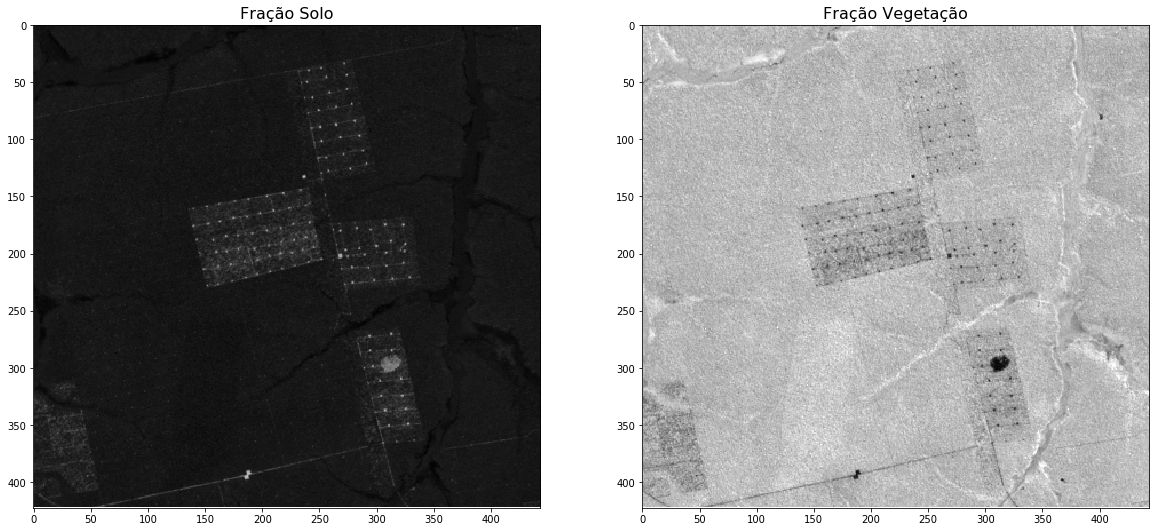

In [5]:
#visualizar as bandas
plt.figure( figsize=( 20, 20) )
plt.subplot(121)
plt.title("Fração Solo",fontsize=16)
plt.imshow(numpy_solo, cmap="gray")

plt.subplot(122)
plt.title("Fração Vegetação",fontsize=16)
plt.imshow(numpy_veg, cmap = "gray")
plt.show()

# Aplicação do índice DEGRADI

Degradi é defido pela equação DEGRADI = G * (imgam_solo/imagem_veg) + *Off

onde G é um valor de ganho e *Off* é um valor de *Offset*

solo
Valor mínimo: 84 Valor máximo: 255 Média: 101.54681809469044
veg
Valor mínimo: 105 Valor máximo: 255 Média: 212.9672651374779
solo_veg
Valor mínimo: 0.33070866141732286 Valor máximo: 1.8571428571428572 Média: 0.47876638981437547
tipo de dado do array 'solo_veg': float64


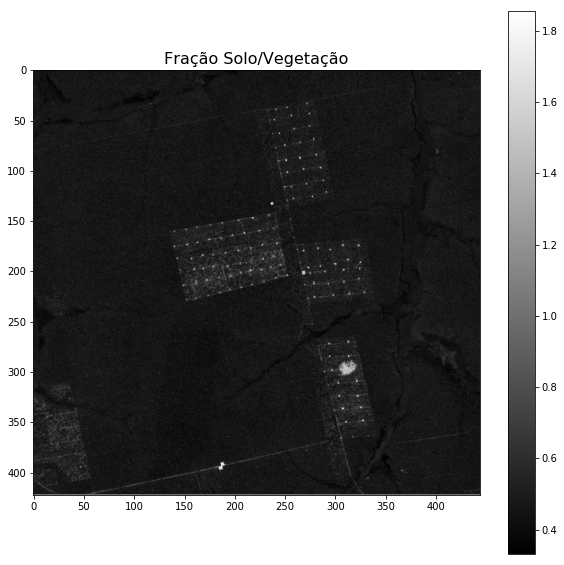

In [6]:
numpy_veg[numpy_veg == 0] = 1
print('solo')
print('Valor mínimo:',numpy_solo.min(), 'Valor máximo:',numpy_solo.max(), 'Média:',numpy_solo.mean())
print('veg')
print('Valor mínimo:',numpy_veg.min(), 'Valor máximo:',numpy_veg.max(), 'Média:',numpy_veg.mean())

solo_veg = (numpy_solo.astype(float) / (numpy_veg.astype(float)))

print('solo_veg')
print('Valor mínimo:',solo_veg.min(), 'Valor máximo:',solo_veg.max(), 'Média:',solo_veg.mean())
print("tipo de dado do array 'solo_veg':",solo_veg.dtype)

solo_veg[solo_veg>2]=0
plt.figure(figsize=( 10, 10))
plt.title("Fração Solo/Vegetação",fontsize=16)
plt.imshow(solo_veg,cmap = "gray")
plt.colorbar();

Entre com um valor de ganho: 50
Entre com um valor de offset: 100
[[150 122 122 ... 126 125 121]
 [150 122 122 ... 122 121 123]
 [150 122 122 ... 123 122 124]
 ...
 [150 122 124 ... 123 122 124]
 [150 121 121 ... 123 124 125]
 [150 150 150 ... 150 150 150]]


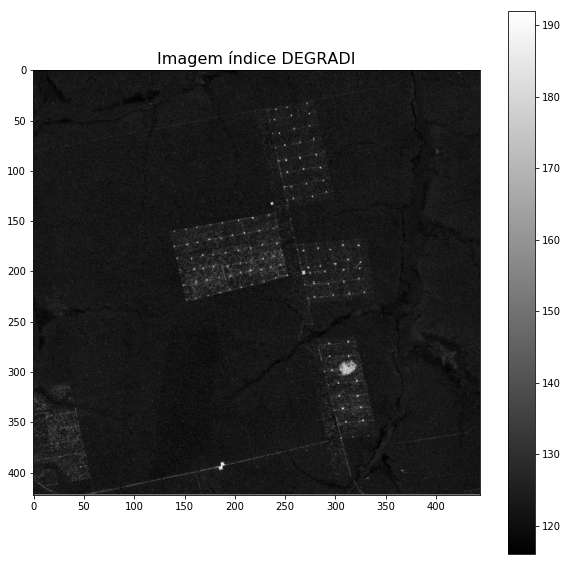

In [7]:
#aplicando o Ganho e o Offset
g = float(input('Entre com um valor de ganho: '))
off = float(input('Entre com um valor de offset: '))
DGDI = ((g*solo_veg)+off)
DGDI = DGDI.astype(int)
print(DGDI)

#Visualizando a imagem índice DEGRADI
plt.figure(figsize=( 10, 10))
plt.title("Imagem índice DEGRADI",fontsize=16)
plt.imshow(DGDI,cmap = "gray")
plt.colorbar()
plt.show();



Entre com um limiar de fatiamento:135
[[ True False False ... False False False]
 [ True False False ... False False False]
 [ True False False ... False False False]
 ...
 [ True False False ... False False False]
 [ True False False ... False False False]
 [ True  True  True ...  True  True  True]]


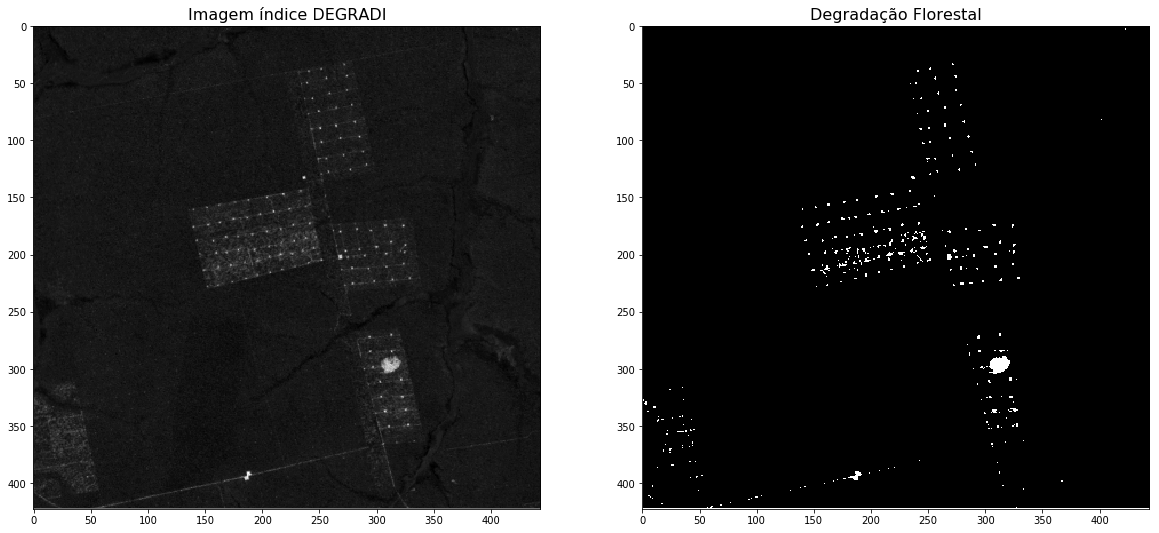

In [8]:
#FATIAMENTO:

#criando variável de atribução do limiar
fat = float(input("Entre com um limiar de fatiamento:"))

DF = DGDI > fat #DF = degradação florestal
print(DF)

#visualizando a imagem fatiada:
plt.figure( figsize=( 20, 20) )
plt.subplot(121)
plt.title("Imagem índice DEGRADI", fontsize=16)
plt.imshow(DGDI, cmap="gray")

plt.subplot(122)
plt.title("Degradação Florestal", fontsize=16)
plt.imshow(DF, cmap = "gray")
plt.show();



In [9]:
#SALVANDO A IMAGEM EM UM ARQUIVO RASTER EM UM ARQUIVO .tif

#definindo uma função para salvar a banda:

def salvar_banda(matriz_de_pixels, nome_do_arquivo, dataset_solo):
    # obter metadados
    linhas = dataset_solo.RasterYSize
    colunas = dataset_solo.RasterXSize
    bandas = 1
    # definir driver
    driver = gdal.GetDriverByName('GTiff')
    # copiar tipo de dados da banda já existente
    data_type = dataset_solo.GetRasterBand(1).DataType
    # criar novo dataset
    dataset_output = driver.Create(nome_do_arquivo, colunas, linhas, bandas, data_type)
    # copiar informações espaciais da banda já existente
    dataset_output.SetGeoTransform(dataset_solo.GetGeoTransform())
    # copiar informações de projeção
    dataset_output.SetProjection(dataset_solo.GetProjectionRef())
    # escrever dados da matriz NumPy na banda
    dataset_output.GetRasterBand(1).WriteArray(matriz_de_pixels)
    # salvar valores
    dataset_output.FlushCache()
    # fechar dataset
    dataset_output = None



In [10]:
#EXECUTANDO A FUNÇÃO salvar_banda
nome_do_arquivo = "C:/Users/vinic/ser347/trabalho_pratico/MLME/DEGRADI_20162.tif"
salvar_banda(DF, nome_do_arquivo, dataset_solo)

# fechar imagens
dataset_solo = None
dataset_veg = None